In [1]:
from tensorflow.python.platform import build_info as tf_build_info
tf_build_info.build_info
import tensorflow as tf

from platform import python_version
print(python_version())

print(tf.__version__)

2024-04-17 12:12:18.403786: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 12:12:18.403849: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 12:12:18.404711: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-17 12:12:18.732673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 12:12:21.379870: W tensorflow/c

3.11.9
2.14.0


In [2]:
from tensorflow.keras import layers, optimizers, losses, metrics, activations, regularizers, callbacks
from keras.models import Model
import numpy as np
import pandas as pd
import shap

In [3]:
# from tensorflow.keras.models import load_model
# model = load_model('ST-CNN-GAP-5.h5')
from tensorflow.keras.models import load_model
model = load_model(r'/global/D1/homes/jayao/XAI-Based-ECG-Diagnostics-main/model/ST-CNN-5_lead7new.h5')

2024-04-17 12:12:36.956607: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 32 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:5e:00.0, compute capability: 7.5
2024-04-17 12:12:36.985809: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:746] failed to allocate 32.50MiB (34078720 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


In [4]:
# Load and preprocess an example ECG signal for visualization
import wfdb
import numpy as np

def load_raw_data(filename, sampling_rate, path):
    if sampling_rate == 100:
        data, meta = wfdb.rdsamp(path + filename + "_lr")
    else:
        data, meta = wfdb.rdsamp(path + filename + "_hr")
    return data

# Example usage
# filename_to_load = "21196"  # ST/T change
# filename_to_load = "02696"  # Hypertrophy
# filename_to_load = "03333"  # Normal ECG
# filename_to_load = "00040"  # Normal ECG
# filename_to_load = "03123"  # CD
# filename_to_load = "03196"  # Normal ECG overleaf
# filename_to_load = "03354"  # MI overleaf
# filename_to_load = "03482"  # MI use this
# filename_to_load = "00262"  # NORMAL
filename_to_load = "01990"  # NORMAL
sampling_rate = 100
# path = "/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/records100/02000/"
# path = "/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/records100/21000/"
# path = "/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/records100/03000/"
path = "/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/records100/01000/"

input_example = load_raw_data(filename_to_load, sampling_rate, path)


In [5]:
input_example.shape

(1000, 12)

In [6]:
import numpy as np

# Extracting values from the second column (Lead 7)
input_example = input_example[:, 6]

In [7]:
input_example = input_example.reshape(1, 1, 1000, 1)   # Add another channel

In [8]:
input_example.shape

(1, 1, 1000, 1)

In [9]:
# Shape of input_example: (1, 1, 1000, 1)
# preprocessed_input = load_image(sys.argv[1])
# x = np.transpose(input_example, (1, 0))                 # transpose matrix
# x = np.expand_dims(x, axis=(0, -1))                # Add another channel on left and right

classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarcation', 'Normal ECG', 'ST/T change']

predictions = model.predict(input_example)


print("Sample belongs to following classes:")
for i in range(5):
    if predictions[0][i] >= 0.5 :
        print(" * " + classes[i])

2024-04-17 12:12:38.059423: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:447] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2024-04-17 12:12:38.059492: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:451] Memory usage: 2621440 bytes free, 15654780928 bytes total.
2024-04-17 12:12:38.059514: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at conv_ops_impl.h:1592 : UNIMPLEMENTED: DNN library is not found.
2024-04-17 12:12:38.346947: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


UnimplementedError: Graph execution error:

Detected at node model/conv2d/Conv2D defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_4129440/4229506006.py", line 8, in <module>

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2631, in predict

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2416, in predict_function

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2401, in step_function

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2389, in run_step

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2357, in predict_step

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call

  File "/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op

DNN library is not found.
	 [[{{node model/conv2d/Conv2D}}]] [Op:__inference_predict_function_1590]

In [10]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assume model is your trained model
# input_example is your input example with shape (1, 1, 1000, 1)

# Define a background dataset (baseline) for Integrated Gradients
background = np.zeros((1, 1, 1000, 1))  # You may want to choose a meaningful baseline

# Create an explainer object using the gradient method
explainer = shap.GradientExplainer(model, background)

# Compute Shapley values for the input example
shap_values = explainer.shap_values(input_example)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
2024-04-17 11:48:11.199760: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 846.61MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-17 11:48:11.339856: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 846.61MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


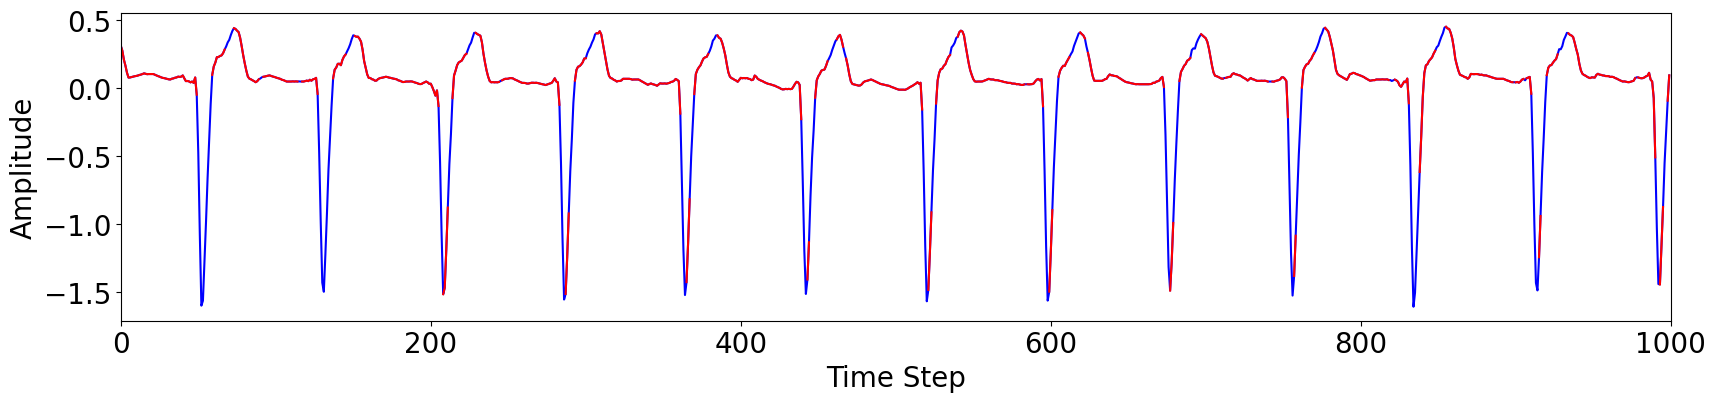

In [42]:


import numpy as np
import matplotlib.pyplot as plt

def plot_shap(ecg_data, sv_data, target_class_idx, lead, threshold, sample_classes):
    nsteps = ecg_data.shape[2]
    x = np.arange(nsteps)
    
    # Get the sample classes
    sample_classes_str = ', '.join([classes[i] for i, prob in enumerate(predictions[0]) if prob >= 0.5])
    
    # Extract SHAP values for the specified lead
    lead_shap_values = sv_data[target_class_idx][0][:, :, 0][lead]
    # Create masks based on the threshold
    sv_upper_mask = lead_shap_values >= threshold
    sv_lower_mask = lead_shap_values < threshold
    
    # Apply masks to ECG data
    sv_upper = np.ma.masked_where(sv_upper_mask, ecg_data[0, 0, :, lead])
    sv_lower = np.ma.masked_where(sv_lower_mask, ecg_data[0, 0, :, lead])
    
    # Plot the ECG data
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(x, ecg_data[0, 0, :, lead], color='blue')
    
    # Overlay the SHAP values where they are above the threshold
    ax.plot(x, sv_upper, color='red')
    
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Amplitude')
    # ax.set_title(f'SHAP Values Overlay (Sample belongs to: {sample_classes_str})')
    # ax.legend()
        
    # Set the x-axis limits to start from zero
    ax.set_xlim(0, nsteps)
    plt.rc('font', size=20) 
    plt.show()

# Example usage:
ecg_data = input_example
sv_data = shap_values
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
lead = 0  # Assuming we want to plot SHAP values for lead 0
# threshold=0.0005 # for 262
threshold=0.004

plot_shap(ecg_data, sv_data, target_class_idx, lead,threshold, sample_classes=classes)


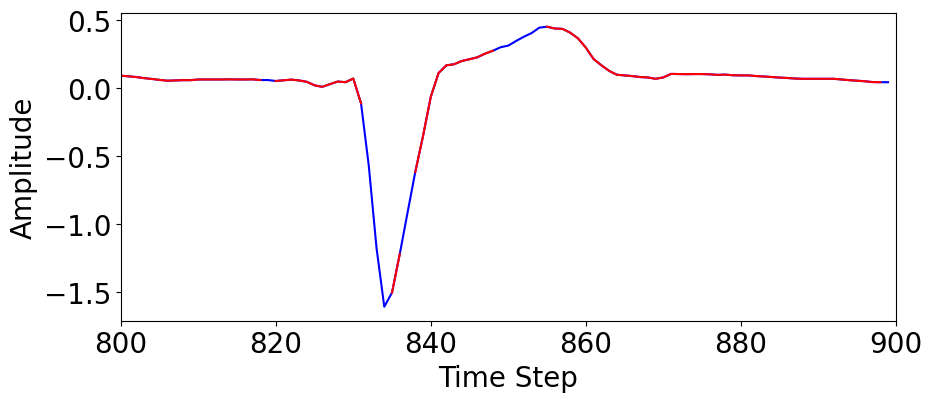

In [43]:
import shap
import numpy as np
import matplotlib.pyplot as plt


# Define a background dataset (baseline) for Integrated Gradients
background = np.zeros((1, 1, 1000, 1))  # You may want to choose a meaningful baseline

# Create an explainer object using the gradient method
explainer = shap.GradientExplainer(model, background)

# Compute Shapley values for the input example
shap_values = explainer.shap_values(input_example)

import numpy as np
import matplotlib.pyplot as plt

def plot_shap2(ecg_data, sv_data, target_class_idx, lead, threshold, sample_classes, start_index, end_index):
    nsteps = ecg_data.shape[2]
    x = np.arange(nsteps)
    
    # Get the sample classes
    sample_classes_str = ', '.join([classes[i] for i, prob in enumerate(predictions[0]) if prob >= 0.5])
    
    # Extract SHAP values for the specified lead
    lead_shap_values = sv_data[target_class_idx][0][:, :, 0][lead]
    # Create masks based on the threshold
    sv_upper_mask = lead_shap_values >= threshold
    sv_lower_mask = lead_shap_values < threshold
    
    # Apply masks to ECG data
    sv_upper = np.ma.masked_where(sv_upper_mask, ecg_data[0, 0, :, lead])
    sv_lower = np.ma.masked_where(sv_lower_mask, ecg_data[0, 0, :, lead])
    
    # Plot the ECG data
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(x[start_index:end_index], ecg_data[0, 0, start_index:end_index, lead], color='blue')
    
    # Overlay the SHAP values where they are above the threshold
    ax.plot(x[start_index:end_index], sv_upper[start_index:end_index], color='red')
    
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Amplitude')
    # ax.set_title(f'SHAP Values Overlay (Sample belongs to: {sample_classes_str})')
    # ax.legend()
    
    # Set the x-axis limits to start from zero
    ax.set_xlim(start_index, end_index)
    plt.rc('font', size=16)
    
    plt.show()

# Example usage:
ecg_data = input_example
sv_data = shap_values
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
lead = 0  # Assuming we want to plot SHAP values for lead 0
# threshold=0.0005
threshold=0.004

plot_shap2(ecg_data, sv_data, target_class_idx, lead, threshold, sample_classes=classes, start_index=800, end_index=900)
# plot_shap2(ecg_data, sv_data, target_class_idx, lead, threshold, sample_classes=classes, start_index=550, end_index=600)


segment_length: 20
segment_shap_values: [0.00268758 0.00306462 0.00871071 0.00906084 0.00433685 0.00430427
 0.0103141  0.00822576 0.00323884 0.00098262 0.00986255 0.01044957
 0.00396452 0.00325419 0.00934843 0.01037268 0.00185119 0.00186944
 0.00833755 0.00927113 0.0029392  0.00256424 0.0119726  0.00797488
 0.00296499 0.00879403 0.01539611 0.00173757 0.00172519 0.00909537
 0.01002905 0.00236532 0.0018537  0.01099564 0.01043284 0.0059121
 0.00090891 0.01228853 0.00971758 0.00266494 0.00434456 0.00859782
 0.00896954 0.00209748 0.00373222 0.00765797 0.00887015 0.00119483
 0.00623385 0.01937799]
top_segments: [30  6 15 34 11 33 22 37 26 49]


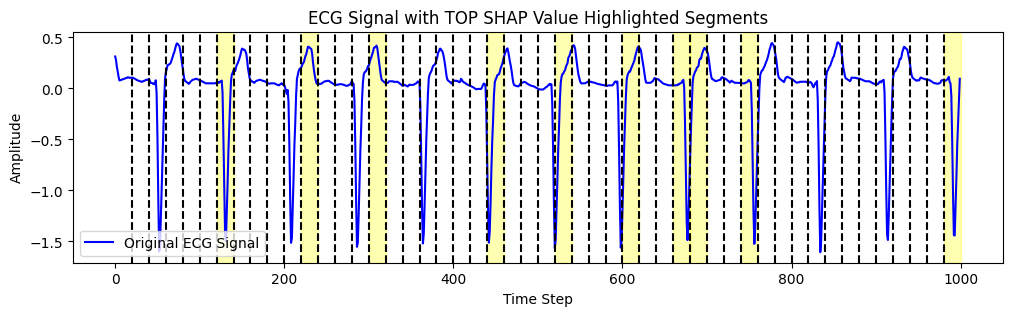

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute SHAP values for each segment
def compute_segment_shap_values(ecg_data, target_class_idx, sv_data, num_slices, lead):
    segment_shap_values = np.zeros(num_slices)
    # num_samples, num_features = sv_data.shape
    segment_length = len(ecg_data) // num_slices
    print(f"segment_length: {segment_length}")


    for i in range(num_slices):
        segment_start = i * segment_length
        segment_end = (i + 1) * segment_length
        # segment_shap_values[i] = np.mean(sv_data[target_class_idx][0][:, segment_start:segment_end, 0][lead])
        segment_shap_values[i] = np.max(sv_data[target_class_idx][0][:, segment_start:segment_end, 0][lead])
    
    return segment_shap_values


# Define a function to plot the ECG signal with highlighted segments based on top SHAP values
def plot_shap_highlighted_segments(ecg_data, sv_data, num_slices, top_segments):
    ecg_data = ecg_data.squeeze()  # Remove singleton dimensions

    plt.figure(figsize=(12, 3))
    plt.rc('font', size=10)

    plt.plot(ecg_data, color='blue', label='Original ECG Signal')

    # Plot vertical lines to separate segments
    for i in range(1, num_slices):
        plt.axvline(x=i * (len(ecg_data) // num_slices), color='black', linestyle='--')

    # Highlight top influential segments
    for segment in top_segments:
        start_idx = segment * (len(ecg_data) // num_slices)
        end_idx = start_idx + (len(ecg_data) // num_slices)
        plt.axvspan(start_idx, end_idx, color='yellow', alpha=0.3)

    plt.title('ECG Signal with TOP SHAP Value Highlighted Segments')
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage:import numpy as np
import matplotlib.pyplot as plt
input_example2 = np.reshape(input_example, (1000, 1))
instance_ecg = input_example2[0:1000]
lead = 0
num_slices = 50  # Number of slices
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
segment_shap_values = compute_segment_shap_values(instance_ecg, target_class_idx, shap_values, num_slices, lead)
print(f"segment_shap_values: {segment_shap_values}")
# Get indices of top segments based on SHAP values
top_segments = np.argsort(segment_shap_values)[-10:]  # Change 5 to the number of top segments you want to visualize
print(f"top_segments: {top_segments}")

# Plot the ECG signal with highlighted segments
plot_shap_highlighted_segments(instance_ecg, shap_values, num_slices, top_segments)

In [10]:
path = "/global/D1/homes/jayao/XAI-Based-ECG-Diagnostics-main/data/"
x_train = np.load(path + 'x_train.npy')
print(x_train.shape)

# Pull lead 7
x_train_new= x_train[:,:, 6]
print("x_train_new :", x_train_new.shape)

x_train = x_train_new.reshape(17420, 1000, 1)
print(x_train.shape)

KeyboardInterrupt: 

In [30]:

import numpy as np
import matplotlib.pyplot as plt
import shap

# Assuming x_train is your training dataset with shape (17420, 1000, 1)

# Define the size of the background dataset
background_size = 1000  # Adjust this based on your computational resources and needs

# Randomly sample instances from the training dataset to create the background dataset
indices = np.random.choice(len(x_train), size=background_size, replace=False)
background_dataset = x_train[indices]

# Create an explainer object using the gradient method
explainer = shap.GradientExplainer(model, background_dataset)

# Compute Shapley values for the input example
shap_values = explainer.shap_values(input_example)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


segment_length: 2
segment_shap_values: [ 1.29963446e-03  1.55384734e-03  1.71967281e-03  4.34043788e-04
  6.03927474e-04  1.45172293e-03  9.45154403e-04  9.56226504e-05
 -5.84888738e-04 -1.89584098e-04  2.94468668e-03  3.76331620e-04
 -4.90068807e-04  6.83445134e-04  7.16305280e-04  4.14501235e-04
 -1.75012916e-04  7.38156610e-04 -9.14946941e-05 -5.24479314e-04
 -5.45063114e-04  8.62908957e-04  1.20724889e-03  1.70493219e-03
  6.96791860e-04  2.51542567e-03  6.31175702e-03  8.03618226e-03
  4.11750982e-03  2.48360913e-03  3.10123665e-04  6.83094980e-03
  1.25495915e-03  2.89302599e-03  6.53773360e-03  2.94029526e-03
 -8.36936408e-04 -3.06480937e-03  9.10431903e-04  8.98324710e-04
  1.39079010e-03  1.59085717e-03 -9.13752738e-05  6.34825381e-04
  9.66287684e-04  1.50652637e-03  4.90406586e-04  4.58840979e-04
  1.23469916e-04  1.10133400e-03]
top_segments: [28 26 34 31 27]


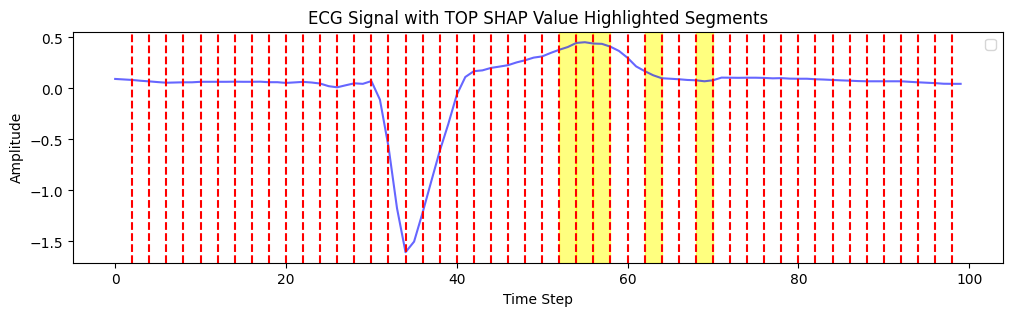

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute SHAP values for each segment
def compute_segment_shap_values(ecg_data, target_class_idx, sv_data, num_slices, lead):
    segment_shap_values = np.zeros(num_slices)
    # num_samples, num_features = sv_data.shape
    segment_length = len(ecg_data) // num_slices
    print(f"segment_length: {segment_length}")


    for i in range(num_slices):
        segment_start = i * segment_length
        segment_end = (i + 1) * segment_length
        # segment_shap_values[i] = np.mean(sv_data[target_class_idx][0][:, segment_start:segment_end, 0][lead])
        segment_shap_values[i] = np.max(sv_data[target_class_idx][0][:, segment_start:segment_end, 0][lead])
    
    return segment_shap_values


# Define a function to plot the ECG signal with highlighted segments based on top SHAP values
def plot_shap_highlighted_segments(ecg_data, sv_data, num_slices, top_segments):
    ecg_data = ecg_data.squeeze()  # Remove singleton dimensions

    plt.figure(figsize=(12, 3))
    plt.rc('font', size=10)

    # plt.plot(ecg_data, color='blue', label='Original ECG Signal', alpha=0.6)
    plt.plot(ecg_data, color='blue', alpha=0.6)

    # Plot vertical lines to separate segments
    for i in range(1, num_slices):
        plt.axvline(x=i * (len(ecg_data) // num_slices), color='r', linestyle='--')

    # Highlight top influential segments
    for segment in top_segments:
        start_idx = segment * (len(ecg_data) // num_slices)
        end_idx = start_idx + (len(ecg_data) // num_slices)
        plt.axvspan(start_idx, end_idx, color='yellow', alpha=0.5)

    plt.title('ECG Signal with TOP SHAP Value Highlighted Segments')
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage:import numpy as np
import matplotlib.pyplot as plt
input_example2 = np.reshape(input_example, (1000, 1))
instance_ecg = input_example2[800:900]
lead = 0
num_slices = 50  # Number of slices
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
segment_shap_values = compute_segment_shap_values(instance_ecg, target_class_idx, shap_values, num_slices, lead)
print(f"segment_shap_values: {segment_shap_values}")
# Get indices of top segments based on SHAP values
top_segments = np.argsort(segment_shap_values)[-5:]  # Change 5 to the number of top segments you want to visualize
print(f"top_segments: {top_segments}")

# Plot the ECG signal with highlighted segments
plot_shap_highlighted_segments(instance_ecg, shap_values, num_slices, top_segments)


segment_length: 1
segment_shap_values: [ 1.47243764e-03  6.76914235e-04  1.19674765e-03  2.68757972e-03
  1.29530218e-03 -8.40885798e-04 -9.68316512e-04 -5.52955316e-04
 -6.10805408e-04  1.41896645e-03  1.96811045e-03  2.52065039e-03
  2.11155345e-03  5.11268445e-04 -2.06247345e-03 -5.37029514e-03
 -3.11653921e-03 -2.35916767e-03 -7.62523734e-04 -4.71010899e-05
  1.95050146e-03  3.06461984e-03  1.18050969e-03  4.98693204e-04
  7.95360756e-05 -5.48000855e-04 -5.13356877e-04 -1.32818808e-04
  1.19160017e-04  9.98480595e-04  8.42190988e-04  3.80878162e-04
 -6.06707006e-04 -1.70631276e-03 -2.14942382e-03 -2.96846800e-03
 -3.11242230e-03 -1.03429961e-03 -8.53863894e-05  3.22693406e-04
 -3.30213108e-03 -2.75466265e-03  1.10499270e-03 -1.54942006e-03
  3.94297473e-04  2.33052857e-03  2.30856542e-03  1.98488729e-03
  3.15394229e-03  1.82835865e-04  7.78781017e-03  8.71070661e-03
 -7.42127537e-04  1.44891138e-03  5.54133765e-03 -7.91164115e-03
  8.48218985e-03 -3.06088338e-03  5.36399707e-03 -2

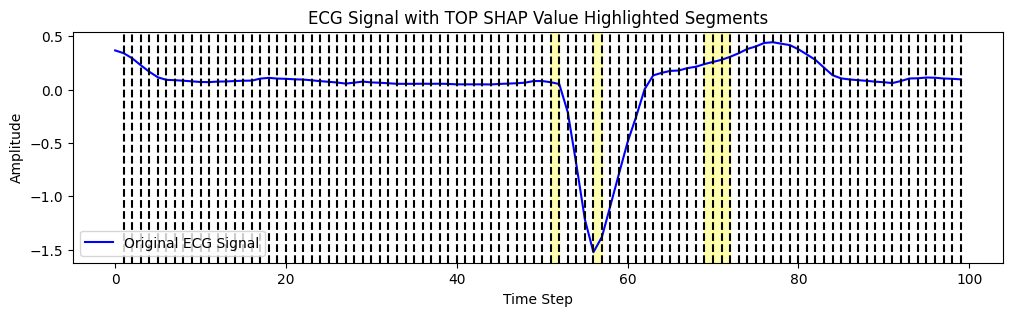

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute SHAP values for each segment
def compute_segment_shap_values(ecg_data, target_class_idx, sv_data, num_slices, lead):
    segment_shap_values = np.zeros(num_slices)
    # num_samples, num_features = sv_data.shape
    segment_length = len(ecg_data) // num_slices
    print(f"segment_length: {segment_length}")


    for i in range(num_slices):
        segment_start = i * segment_length
        segment_end = (i + 1) * segment_length
        # segment_shap_values[i] = np.mean(sv_data[target_class_idx][0][:, segment_start:segment_end, 0][lead])
        segment_shap_values[i] = np.max(sv_data[target_class_idx][0][:, segment_start:segment_end, 0][lead])
    
    return segment_shap_values


# Define a function to plot the ECG signal with highlighted segments based on top SHAP values
def plot_shap_highlighted_segments(ecg_data, sv_data, num_slices, top_segments):
    ecg_data = ecg_data.squeeze()  # Remove singleton dimensions

    plt.figure(figsize=(12, 3))
    plt.rc('font', size=10)

    plt.plot(ecg_data, color='blue', label='Original ECG Signal')

    # Plot vertical lines to separate segments
    for i in range(1, num_slices):
        plt.axvline(x=i * (len(ecg_data) // num_slices), color='black', linestyle='--')

    # Highlight top influential segments
    for segment in top_segments:
        start_idx = segment * (len(ecg_data) // num_slices)
        end_idx = start_idx + (len(ecg_data) // num_slices)
        plt.axvspan(start_idx, end_idx, color='yellow', alpha=0.3)

    plt.title('ECG Signal with TOP SHAP Value Highlighted Segments')
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage:import numpy as np
import matplotlib.pyplot as plt
input_example2 = np.reshape(input_example, (1000, 1))
instance_ecg = input_example2[700:800]
lead = 0
num_slices = 100  # Number of slices
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
segment_shap_values = compute_segment_shap_values(instance_ecg, target_class_idx, shap_values, num_slices, lead)
print(f"segment_shap_values: {segment_shap_values}")
# Get indices of top segments based on SHAP values
top_segments = np.argsort(segment_shap_values)[-5:]  # Change 5 to the number of top segments you want to visualize
print(f"top_segments: {top_segments}")

# Plot the ECG signal with highlighted segments
plot_shap_highlighted_segments(instance_ecg, shap_values, num_slices, top_segments)

segment_length: 2
segment_shap_values: [ 1.47243764e-03  2.68757972e-03  1.29530218e-03 -5.52955316e-04
  1.41896645e-03  2.52065039e-03  2.11155345e-03 -2.06247345e-03
 -2.35916767e-03 -4.71010899e-05  3.06461984e-03  1.18050969e-03
  7.95360756e-05 -1.32818808e-04  9.98480595e-04  8.42190988e-04
 -6.06707006e-04 -2.14942382e-03 -1.03429961e-03  3.22693406e-04
 -2.75466265e-03  1.10499270e-03  2.33052857e-03  2.30856542e-03
  3.15394229e-03  8.71070661e-03  1.44891138e-03  5.54133765e-03
  8.48218985e-03  5.36399707e-03 -5.82195644e-05  3.08927149e-03
  1.31287950e-03  2.61777570e-03  9.06084478e-03  8.19880050e-03
  6.48684613e-03 -2.60856631e-03  6.95523922e-04  6.84404804e-05
  1.77333888e-03  5.40435954e-04 -1.06413732e-03 -5.57223801e-04
  2.27916450e-03  4.33685118e-03  2.52657686e-03 -4.17994196e-03
 -3.30488954e-04  2.08212668e-03]
top_segments: [32  4 26  0 40 49  6 44 23 22  5 46 33  1 10 31 24 45 29 27 36 35 28 25
 34]


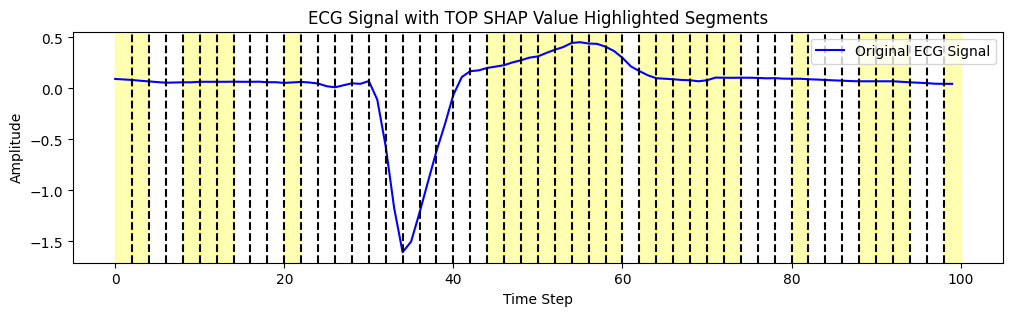

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute SHAP values for each segment
def compute_segment_shap_values(ecg_data, target_class_idx, sv_data, num_slices, lead):
    segment_shap_values = np.zeros(num_slices)
    # num_samples, num_features = sv_data.shape
    segment_length = len(ecg_data) // num_slices
    print(f"segment_length: {segment_length}")


    for i in range(num_slices):
        segment_start = i * segment_length
        segment_end = (i + 1) * segment_length
        # segment_shap_values[i] = np.mean(sv_data[target_class_idx][0][:, segment_start:segment_end, 0][lead])
        segment_shap_values[i] = np.max(sv_data[target_class_idx][0][:, segment_start:segment_end, 0][lead])
    
    return segment_shap_values


# Define a function to plot the ECG signal with highlighted segments based on top SHAP values
def plot_shap_highlighted_segments(ecg_data, sv_data, num_slices, top_segments):
    ecg_data = ecg_data.squeeze()  # Remove singleton dimensions

    plt.figure(figsize=(12, 3))
    plt.rc('font', size=10)

    plt.plot(ecg_data, color='blue', label='Original ECG Signal')

    # Plot vertical lines to separate segments
    for i in range(1, num_slices):
        plt.axvline(x=i * (len(ecg_data) // num_slices), color='black', linestyle='--')

    # Highlight top influential segments
    for segment in top_segments:
        start_idx = segment * (len(ecg_data) // num_slices)
        end_idx = start_idx + (len(ecg_data) // num_slices)
        plt.axvspan(start_idx, end_idx, color='yellow', alpha=0.3)

    plt.title('ECG Signal with TOP SHAP Value Highlighted Segments')
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage:import numpy as np
import matplotlib.pyplot as plt
input_example2 = np.reshape(input_example, (1000, 1))
instance_ecg = input_example2[800:900]
lead = 0
num_slices = 50  # Number of slices
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
segment_shap_values = compute_segment_shap_values(instance_ecg, target_class_idx, shap_values, num_slices, lead)
print(f"segment_shap_values: {segment_shap_values}")
# Get indices of top segments based on SHAP values
top_segments = np.argsort(segment_shap_values)[-25:]  # Change 5 to the number of top segments you want to visualize
print(f"top_segments: {top_segments}")

# Plot the ECG signal with highlighted segments
plot_shap_highlighted_segments(instance_ecg, shap_values, num_slices, top_segments)

1/1 [==============================] - 0s 26ms/step


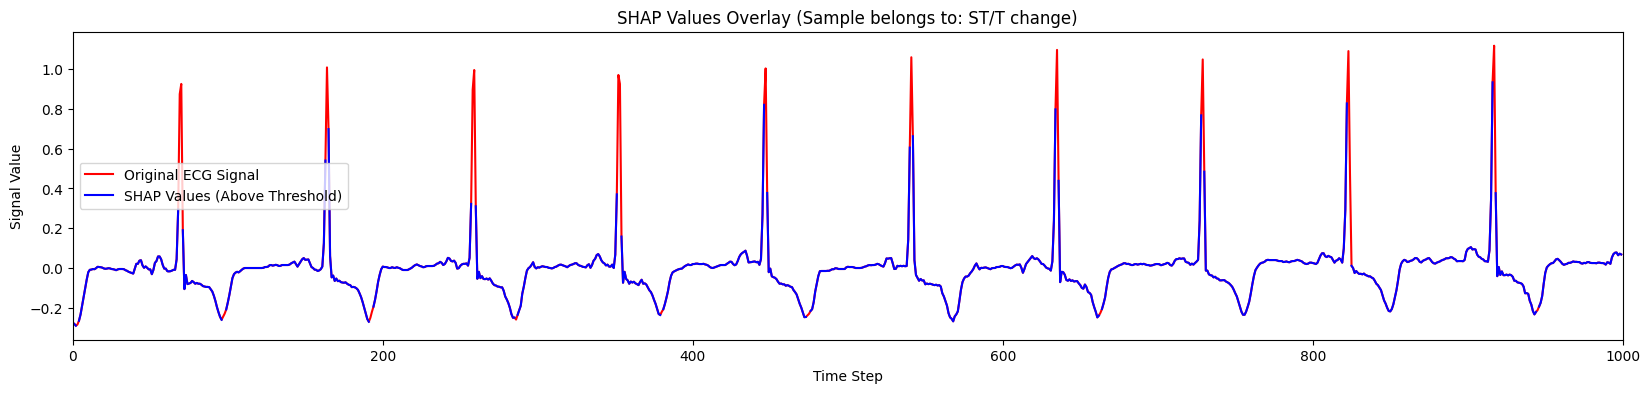

In [31]:

# filename_to_load = "00291"  # Normal ECG overleaf
# path = "/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/records100/00000/"

filename_to_load = "03204"  # STTC ECG overleaf: sinus rhythm. small inferior q waves noted. left ventricular hypertrophy. t inversion in anterolateral leads: strain is a likely cause but also consider ischaemia.
path = "/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/records100/03000/"

input_example = load_raw_data(filename_to_load, sampling_rate, path)
import numpy as np
# Extracting values from the second column (Lead 1)
input_example = input_example[:, 0]
input_example = input_example.reshape(1, 1, 1000, 1)   # Add another channel
predictions = model.predict(input_example)


import shap
import numpy as np
import matplotlib.pyplot as plt

# Assume model is your trained model
# input_example is your input example with shape (1, 1, 1000, 1)

# Define a background dataset (baseline) for Integrated Gradients
background = np.zeros((1, 1, 1000, 1))  # You may want to choose a meaningful baseline

# Create an explainer object using the gradient method
explainer = shap.GradientExplainer(model, background)

# Compute Shapley values for the input example
shap_values = explainer.shap_values(input_example)

import numpy as np
import matplotlib.pyplot as plt

def plot_shap(ecg_data, sv_data, target_class_idx, lead, threshold, sample_classes):
    nsteps = ecg_data.shape[2]
    x = np.arange(nsteps)
    
    # Get the sample classes
    sample_classes_str = ', '.join([classes[i] for i, prob in enumerate(predictions[0]) if prob >= 0.5])
    
    # Extract SHAP values for the specified lead
    lead_shap_values = sv_data[target_class_idx][0][:, :, 0][lead]
    # Create masks based on the threshold
    sv_upper_mask = lead_shap_values >= threshold
    sv_lower_mask = lead_shap_values < threshold
    
    # Apply masks to ECG data
    sv_upper = np.ma.masked_where(sv_upper_mask, ecg_data[0, 0, :, lead])
    sv_lower = np.ma.masked_where(sv_lower_mask, ecg_data[0, 0, :, lead])
    
    # Plot the ECG data
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(x, ecg_data[0, 0, :, lead], label='Original ECG Signal', color='red')
    
    # Overlay the SHAP values where they are above the threshold
    ax.plot(x, sv_upper, label='SHAP Values (Above Threshold)', color='blue')
    
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Signal Value')
    ax.set_title(f'SHAP Values Overlay (Sample belongs to: {sample_classes_str})')
    ax.legend()
    
    # Set the x-axis limits to start from zero
    ax.set_xlim(0, nsteps)
    
    plt.show()

# Example usage:
ecg_data = input_example
sv_data = shap_values
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
lead = 0  # Assuming we want to plot SHAP values for lead 0
# threshold=0.00000000000000000000001
threshold=0.005

plot_shap(ecg_data, sv_data, target_class_idx, lead,threshold, sample_classes=classes)


1/1 [==============================] - 0s 177ms/step


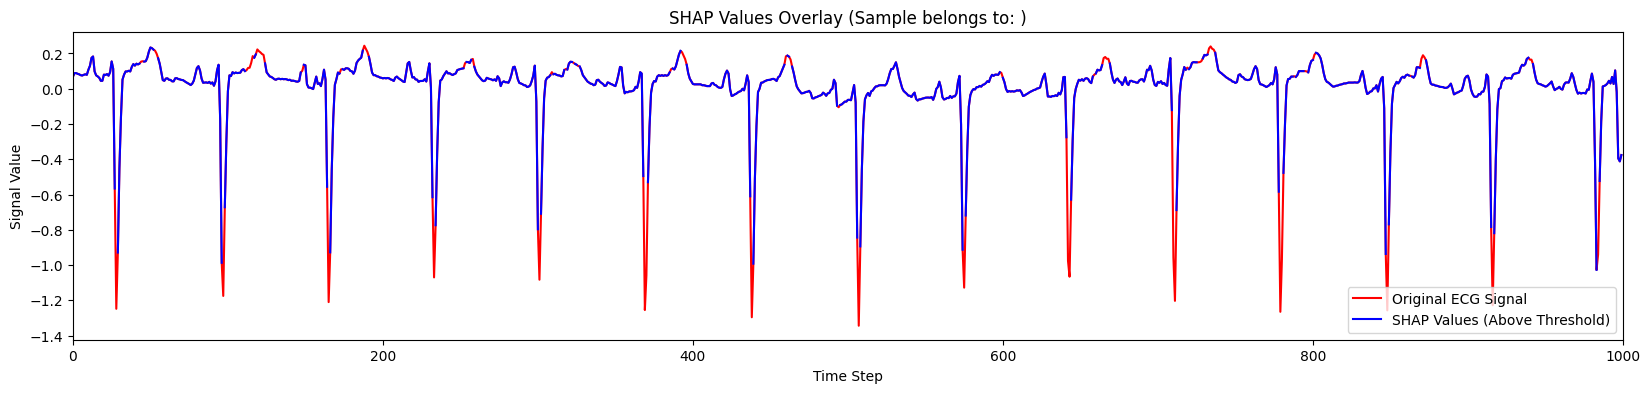

In [15]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assume model is your trained model
# input_example is your input example with shape (1, 1, 1000, 1)
# Extracting values from the second column (Lead 7)
input_example = load_raw_data(filename_to_load, sampling_rate, path)
input_example = input_example[:, 6]
input_example = input_example.reshape(1, 1, 1000, 1)   # Add another channel
predictions = model.predict(input_example)
model = load_model(r'/global/D1/homes/jayao/XAI-Based-ECG-Diagnostics-main/model/ST-CNN-5_lead7.h5')

# Define a background dataset (baseline) for Integrated Gradients
background = np.zeros((1, 1, 1000, 1))  # You may want to choose a meaningful baseline

# Create an explainer object using the gradient method
explainer = shap.GradientExplainer(model, background)

# Compute Shapley values for the input example
shap_values = explainer.shap_values(input_example)

import numpy as np
import matplotlib.pyplot as plt

def plot_shap(ecg_data, sv_data, target_class_idx, lead, threshold, sample_classes):
    nsteps = ecg_data.shape[2]
    x = np.arange(nsteps)
    
    # Get the sample classes
    sample_classes_str = ', '.join([classes[i] for i, prob in enumerate(predictions[0]) if prob >= 0.5])
    
    # Extract SHAP values for the specified lead
    lead_shap_values = sv_data[target_class_idx][0][:, :, 0][lead]
    # Create masks based on the threshold
    sv_upper_mask = lead_shap_values >= threshold
    sv_lower_mask = lead_shap_values < threshold
    
    # Apply masks to ECG data
    sv_upper = np.ma.masked_where(sv_upper_mask, ecg_data[0, 0, :, lead])
    sv_lower = np.ma.masked_where(sv_lower_mask, ecg_data[0, 0, :, lead])
    
    # Plot the ECG data
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(x, ecg_data[0, 0, :, lead], label='Original ECG Signal', color='red')
    
    # Overlay the SHAP values where they are above the threshold
    ax.plot(x, sv_upper, label='SHAP Values (Above Threshold)', color='blue')
    
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Signal Value')
    ax.set_title(f'SHAP Values Overlay (Sample belongs to: {sample_classes_str})')
    ax.legend()
    
    # Set the x-axis limits to start from zero
    ax.set_xlim(0, nsteps)
    
    plt.show()

# Example usage:
ecg_data = input_example
sv_data = shap_values
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
lead = 0  # Assuming we want to plot SHAP values for lead 0
threshold=0.005

plot_shap(ecg_data, sv_data, target_class_idx, lead,threshold, sample_classes=classes)


1/1 [==============================] - 0s 220ms/step


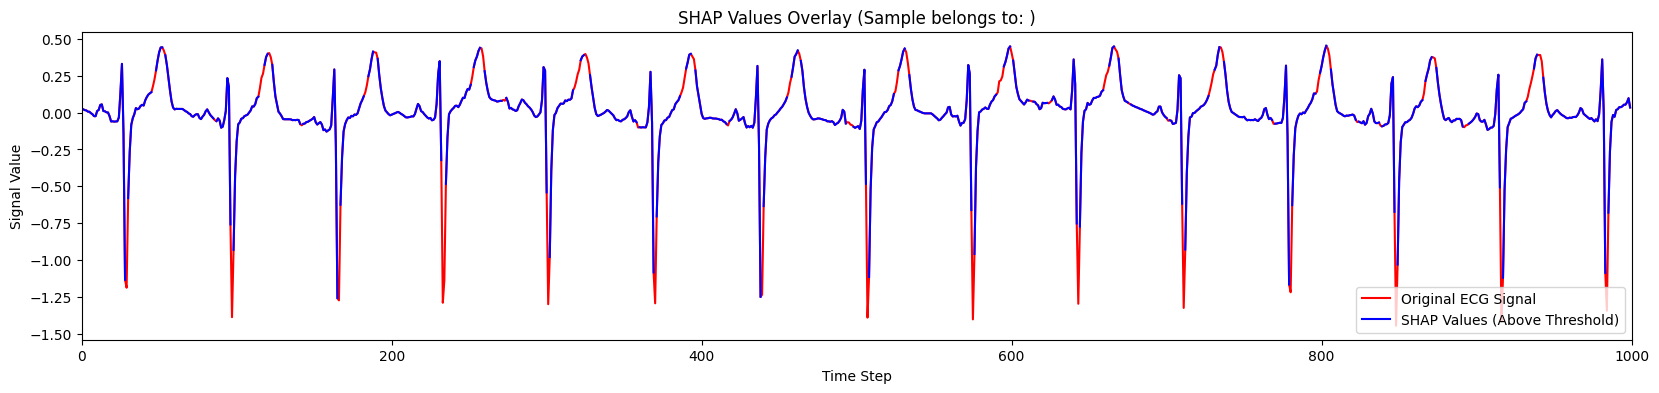

In [16]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assume model is your trained model
# input_example is your input example with shape (1, 1, 1000, 1)
# Extracting values from the second column (Lead 8)
input_example = load_raw_data(filename_to_load, sampling_rate, path)
input_example = input_example[:, 7]
input_example = input_example.reshape(1, 1, 1000, 1)   # Add another channel
predictions = model.predict(input_example)
model = load_model(r'/global/D1/homes/jayao/XAI-Based-ECG-Diagnostics-main/model/ST-CNN-5_lead8.h5')

# Define a background dataset (baseline) for Integrated Gradients
background = np.zeros((1, 1, 1000, 1))  # You may want to choose a meaningful baseline

# Create an explainer object using the gradient method
explainer = shap.GradientExplainer(model, background)

# Compute Shapley values for the input example
shap_values = explainer.shap_values(input_example)

import numpy as np
import matplotlib.pyplot as plt

def plot_shap(ecg_data, sv_data, target_class_idx, lead, threshold, sample_classes):
    nsteps = ecg_data.shape[2]
    x = np.arange(nsteps)
    
    # Get the sample classes
    sample_classes_str = ', '.join([classes[i] for i, prob in enumerate(predictions[0]) if prob >= 0.5])
    
    # Extract SHAP values for the specified lead
    lead_shap_values = sv_data[target_class_idx][0][:, :, 0][lead]
    # Create masks based on the threshold
    sv_upper_mask = lead_shap_values >= threshold
    sv_lower_mask = lead_shap_values < threshold
    
    # Apply masks to ECG data
    sv_upper = np.ma.masked_where(sv_upper_mask, ecg_data[0, 0, :, lead])
    sv_lower = np.ma.masked_where(sv_lower_mask, ecg_data[0, 0, :, lead])
    
    # Plot the ECG data
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(x, ecg_data[0, 0, :, lead], label='Original ECG Signal', color='red')
    
    # Overlay the SHAP values where they are above the threshold
    ax.plot(x, sv_upper, label='SHAP Values (Above Threshold)', color='blue')
    
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Signal Value')
    ax.set_title(f'SHAP Values Overlay (Sample belongs to: {sample_classes_str})')
    ax.legend()
    
    # Set the x-axis limits to start from zero
    ax.set_xlim(0, nsteps)
    
    plt.show()

# Example usage:
ecg_data = input_example
sv_data = shap_values
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
lead = 0  # Assuming we want to plot SHAP values for lead 0
threshold=0.005

plot_shap(ecg_data, sv_data, target_class_idx, lead,threshold, sample_classes=classes)


1/1 [==============================] - 0s 184ms/step


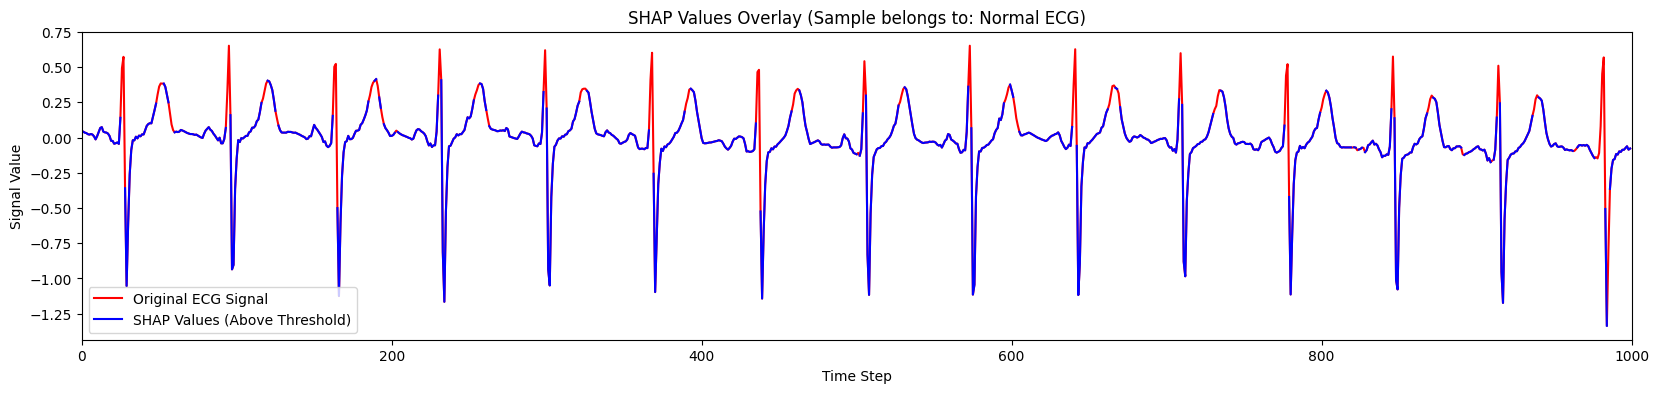

In [17]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assume model is your trained model
# input_example is your input example with shape (1, 1, 1000, 1)
# Extracting values from the second column (Lead 9)
input_example = load_raw_data(filename_to_load, sampling_rate, path)
input_example = input_example[:, 8]
input_example = input_example.reshape(1, 1, 1000, 1)   # Add another channel
predictions = model.predict(input_example)
model = load_model(r'/global/D1/homes/jayao/XAI-Based-ECG-Diagnostics-main/model/ST-CNN-5_lead9.h5')

# Define a background dataset (baseline) for Integrated Gradients
background = np.zeros((1, 1, 1000, 1))  # You may want to choose a meaningful baseline

# Create an explainer object using the gradient method
explainer = shap.GradientExplainer(model, background)

# Compute Shapley values for the input example
shap_values = explainer.shap_values(input_example)

import numpy as np
import matplotlib.pyplot as plt

def plot_shap(ecg_data, sv_data, target_class_idx, lead, threshold, sample_classes):
    nsteps = ecg_data.shape[2]
    x = np.arange(nsteps)
    
    # Get the sample classes
    sample_classes_str = ', '.join([classes[i] for i, prob in enumerate(predictions[0]) if prob >= 0.5])
    
    # Extract SHAP values for the specified lead
    lead_shap_values = sv_data[target_class_idx][0][:, :, 0][lead]
    # Create masks based on the threshold
    sv_upper_mask = lead_shap_values >= threshold
    sv_lower_mask = lead_shap_values < threshold
    
    # Apply masks to ECG data
    sv_upper = np.ma.masked_where(sv_upper_mask, ecg_data[0, 0, :, lead])
    sv_lower = np.ma.masked_where(sv_lower_mask, ecg_data[0, 0, :, lead])
    
    # Plot the ECG data
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(x, ecg_data[0, 0, :, lead], label='Original ECG Signal', color='red')
    
    # Overlay the SHAP values where they are above the threshold
    ax.plot(x, sv_upper, label='SHAP Values (Above Threshold)', color='blue')
    
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Signal Value')
    ax.set_title(f'SHAP Values Overlay (Sample belongs to: {sample_classes_str})')
    ax.legend()
    
    # Set the x-axis limits to start from zero
    ax.set_xlim(0, nsteps)
    
    plt.show()

# Example usage:
ecg_data = input_example
sv_data = shap_values
classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarction', 'Normal ECG', 'ST/T change']
target_class_idx = np.argmax(predictions[0])  # Assuming there's only one prediction
lead = 0  # Assuming we want to plot SHAP values for lead 0
threshold=0.005

plot_shap(ecg_data, sv_data, target_class_idx, lead,threshold, sample_classes=classes)


### Summary Plot

Shape of SHAP values for class 4: (1, 1, 100, 1)


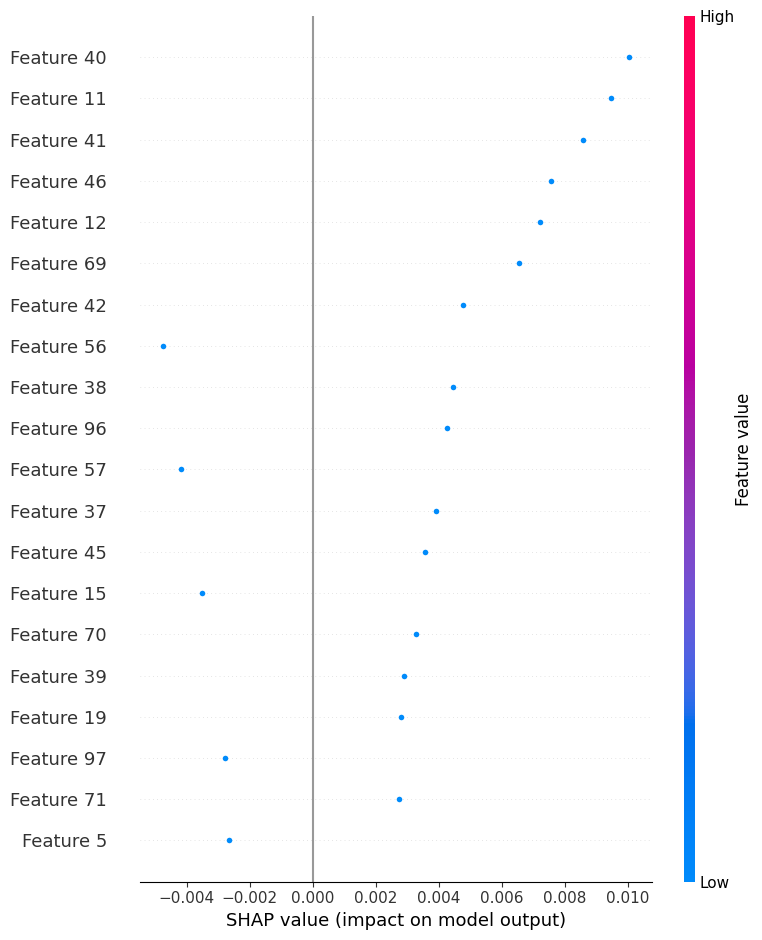

In [60]:
# Assuming you want to plot the SHAP summary for the 4th class
class_index = 3  # Note that class indices are zero-based, so index 3 corresponds to the 4th class

# Extract the SHAP values for the desired class
shap_values_class_4 = shap_values[class_index][:, :, :100, :]  # Take only the first 100 values

# Take only the first 100 values of the input example
input_example_subset = input_example[:, :, :100, :]

# Check the shape of the SHAP values for the specific class
print("Shape of SHAP values for class 4:", shap_values_class_4.shape)

# Ensure both input_example and shap_values_class_4 have the same shape
assert input_example_subset.shape == shap_values_class_4.shape, "Shape mismatch between input data and SHAP values for class 4"

# Plot the SHAP summary
shap.summary_plot(shap_values_class_4.reshape(-1, 100), input_example_subset.reshape(-1, 100))


### Top 500 SHAP Values

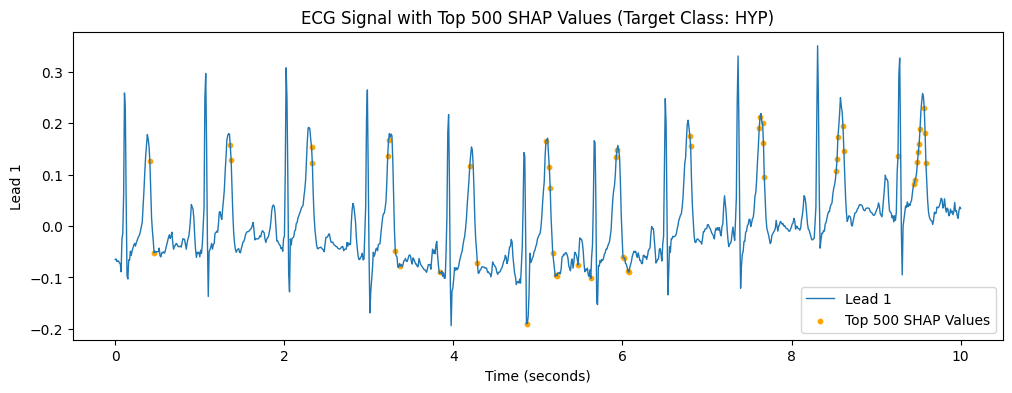

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sample ECG data with dimensions [batch size, 1, 1000, 1]
ecg_data = input_example

# Sample SHAP values with dimensions [batch size, 5, 1, 1000, 1]
shap_values = shap_values

# Select the SHAP values for the target class (e.g., class 3)
target_class_idx = 2  # Assuming class index 2 corresponds to the target class
target_shap_values = shap_values[target_class_idx][0][:, :, 0]

# Identify the top 500 SHAP values and their corresponding indices
top_indices = np.argsort(np.abs(target_shap_values).ravel())[-50:]
top_indices = np.unravel_index(top_indices, target_shap_values.shape)


# Create a time array
sampling_rate = 100  # Replace with your actual sampling rate
time = np.linspace(0, ecg_data.shape[2] / sampling_rate, ecg_data.shape[2])

# Plot the ECG signal with overlay of SHAP values for the target class
fig, ax = plt.subplots(figsize=(12, 4))

lead_data = ecg_data[0, 0, :, 0]
ax.plot(time, lead_data, lw=1, label='Lead 1')
top_shap_values = target_shap_values[top_indices]

# Scale the SHAP values to the range of ECG data for better visualization
scaled_shap_values = top_shap_values * (np.max(lead_data) - np.min(lead_data)) + np.min(lead_data)

# Highlight corresponding ECG signal points with orange color
ax.scatter(time[top_indices[1]], lead_data[top_indices[1]], color='orange', s=10, label='Top 500 SHAP Values')

ax.set_ylabel('Lead 1')
ax.set_xlabel('Time (seconds)')
ax.legend()
plt.title('ECG Signal with Top 500 SHAP Values (Target Class: HYP)')
plt.show()


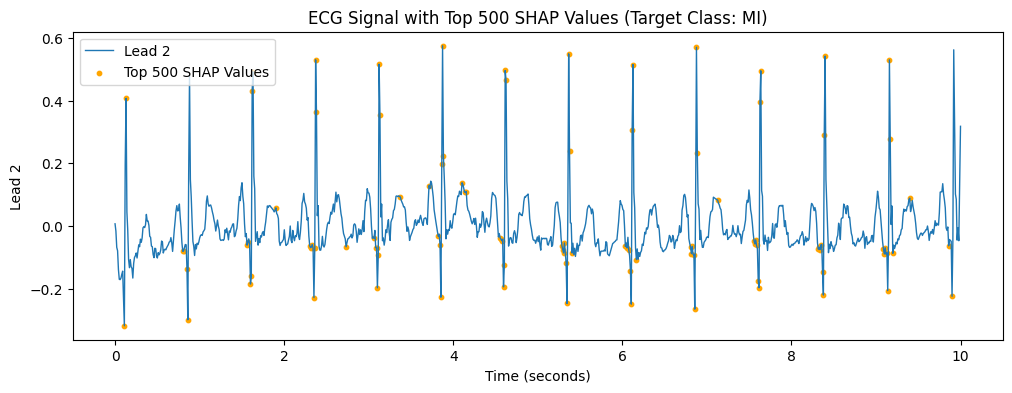

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Sample ECG data with dimensions [batch size, 1, 1000, 1]
ecg_data = input_example

# Sample SHAP values with dimensions [batch size, 5, 1, 1000, 1]
shap_values = shap_values

# Select the SHAP values for the target class (e.g., class 3)
target_class_idx = 2  # Assuming class index 2 corresponds to the target class
target_shap_values = shap_values[target_class_idx][0][:, :, 0]

# Identify the top 500 SHAP values and their corresponding indices
top_indices = np.argsort(np.abs(target_shap_values).ravel())[-500:]
top_indices = np.unravel_index(top_indices, target_shap_values.shape)


# Create a time array
sampling_rate = 100  # Replace with your actual sampling rate
time = np.linspace(0, ecg_data.shape[2] / sampling_rate, ecg_data.shape[2])

# Plot the ECG signal with overlay of SHAP values for the target class
fig, ax = plt.subplots(figsize=(12, 4))

lead_data = ecg_data[0, 0, :, 0]
ax.plot(time, lead_data, lw=1, label='Lead 2')
top_shap_values = target_shap_values[top_indices]

# Scale the SHAP values to the range of ECG data for better visualization
scaled_shap_values = top_shap_values * (np.max(lead_data) - np.min(lead_data)) + np.min(lead_data)

# Highlight corresponding ECG signal points with orange color
ax.scatter(time[top_indices[1]], lead_data[top_indices[1]], color='orange', s=10, label='Top 500 SHAP Values')

ax.set_ylabel('Lead 2')
ax.set_xlabel('Time (seconds)')
ax.legend()
plt.title('ECG Signal with Top 500 SHAP Values (Target Class: MI)')
plt.show()


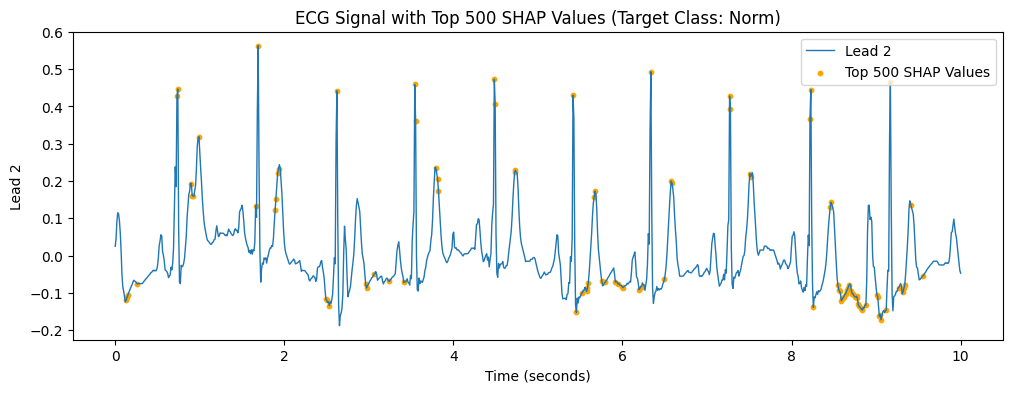

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Sample ECG data with dimensions [batch size, 1, 1000, 1]
ecg_data = input_example

# Sample SHAP values with dimensions [batch size, 5, 1, 1000, 1]
shap_values = shap_values

# Select the SHAP values for the target class (e.g., class 3)
target_class_idx = 2  # Assuming class index 2 corresponds to the target class
target_shap_values = shap_values[target_class_idx][0][:, :, 0]

# Identify the top 500 SHAP values and their corresponding indices
top_indices = np.argsort(np.abs(target_shap_values).ravel())[-100:]
top_indices = np.unravel_index(top_indices, target_shap_values.shape)


# Create a time array
sampling_rate = 100  # Replace with your actual sampling rate
time = np.linspace(0, ecg_data.shape[2] / sampling_rate, ecg_data.shape[2])

# Plot the ECG signal with overlay of SHAP values for the target class
fig, ax = plt.subplots(figsize=(12, 4))

lead_data = ecg_data[0, 0, :, 0]
ax.plot(time, lead_data, lw=1, label='Lead 2')
top_shap_values = target_shap_values[top_indices]

# Scale the SHAP values to the range of ECG data for better visualization
scaled_shap_values = top_shap_values * (np.max(lead_data) - np.min(lead_data)) + np.min(lead_data)

# Highlight corresponding ECG signal points with orange color
ax.scatter(time[top_indices[1]], lead_data[top_indices[1]], color='orange', s=10, label='Top 500 SHAP Values')

ax.set_ylabel('Lead 2')
ax.set_xlabel('Time (seconds)')
ax.legend()
plt.title('ECG Signal with Top 500 SHAP Values (Target Class: Norm)')
plt.show()


In [44]:
shap_path = "/global/D1/homes/jayao/XAI-Based-ECG-Diagnostics-main/data/"
# Save SHAP values to a file
np.save(shap_path + 'shap_values.npy', shap_values)

In [17]:
shap_values = np.load('shap_values.npy')
shap_values.shape

# Old output: (5, 5, 12, 1000, 1)

FileNotFoundError: [Errno 2] No such file or directory: 'shap_values.npy'

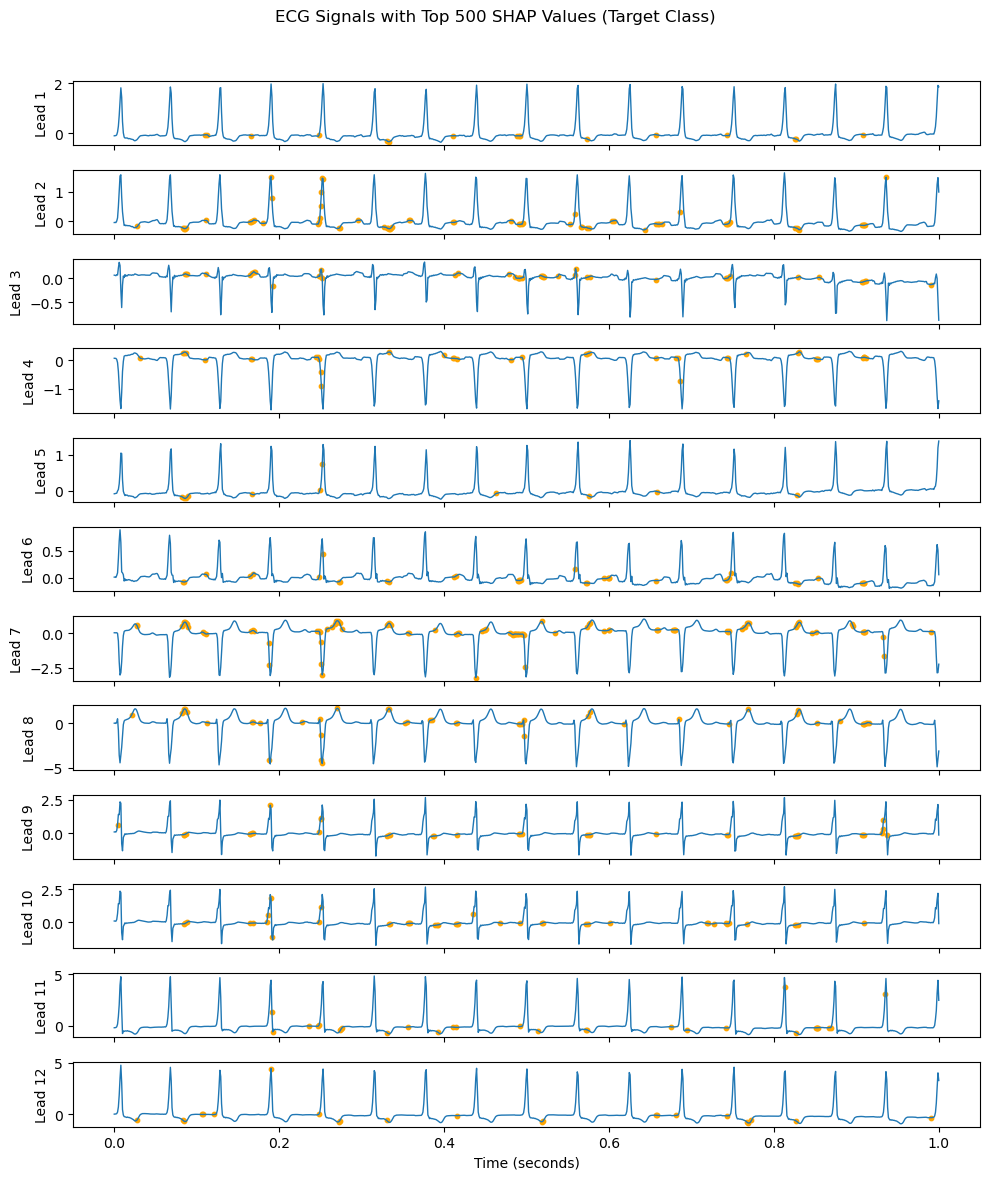

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample ECG data with dimensions [batch size, 12, 1000, 1]

ecg_data = x
batch_size, num_leads, signal_length, _ = ecg_data.shape

# Sample SHAP values with dimensions [batch size, 5, 12, 1000, 1]

shap_values = shap_values

# Select the SHAP values for the target class (e.g., class 3)
target_class_idx = 1  # Assuming class index 2 corresponds to the target class
target_shap_values = shap_values[0, target_class_idx, :, :, 0]

# Identify the top 500 SHAP values and their corresponding indices
top_indices = np.unravel_index(np.argsort(np.abs(target_shap_values).ravel())[-500:], target_shap_values.shape)

# Create a time array
sampling_rate = 100  # Replace with your actual sampling rate
time = np.linspace(0, signal_length / sampling_rate, signal_length)

# Create subplots for each lead
fig, axes = plt.subplots(num_leads, 1, figsize=(10, 12), sharex=True)

# Plot each lead with overlay of SHAP values for the target class
for lead_idx in range(num_leads):
    lead_data = ecg_data[0, lead_idx, :, 0]
    axes[lead_idx].plot(time, lead_data, lw=1, label=f'Lead {lead_idx + 1}')
    top_shap_indices = np.where(top_indices[0] == lead_idx)[0]
    top_shap_values = target_shap_values[lead_idx, top_indices[1][top_shap_indices]]

    # Scale the SHAP values to the range of ECG data for better visualization
    scaled_shap_values = top_shap_values * (np.max(lead_data) - np.min(lead_data)) + np.min(lead_data)
    
    # Highlight corresponding ECG signal points with orange color
    axes[lead_idx].scatter(time[top_indices[1][top_shap_indices]], lead_data[top_indices[1][top_shap_indices]], color='orange', s=10)
    axes[lead_idx].set_ylabel(f'Lead {lead_idx + 1}')

axes[num_leads - 1].set_xlabel('Time (seconds)')
plt.suptitle('ECG Signals with Top 500 SHAP Values (Target Class)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

